In [2]:
#Работа с облачными хранилищами
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [3]:
#Все необходимые импорты
import pandas as pd
import numpy as np
import missingno as msno

In [4]:
#Все необходимые датафреймы
courses = pd.read_csv("/gdrive/My Drive/skillbox/course_work_1/courses.csv", sep=',')
students = pd.read_csv("/gdrive/My Drive/skillbox/course_work_1/students.csv", sep=',')
course_contents = pd.read_csv("/gdrive/My Drive/skillbox/course_work_1/course_contents.csv", sep=',')
progresses = pd.read_csv("/gdrive/My Drive/skillbox/course_work_1/progresses.csv", sep=',')
progress_phases = pd.read_csv("/gdrive/My Drive/skillbox/course_work_1/progress_phases.csv", sep=',')

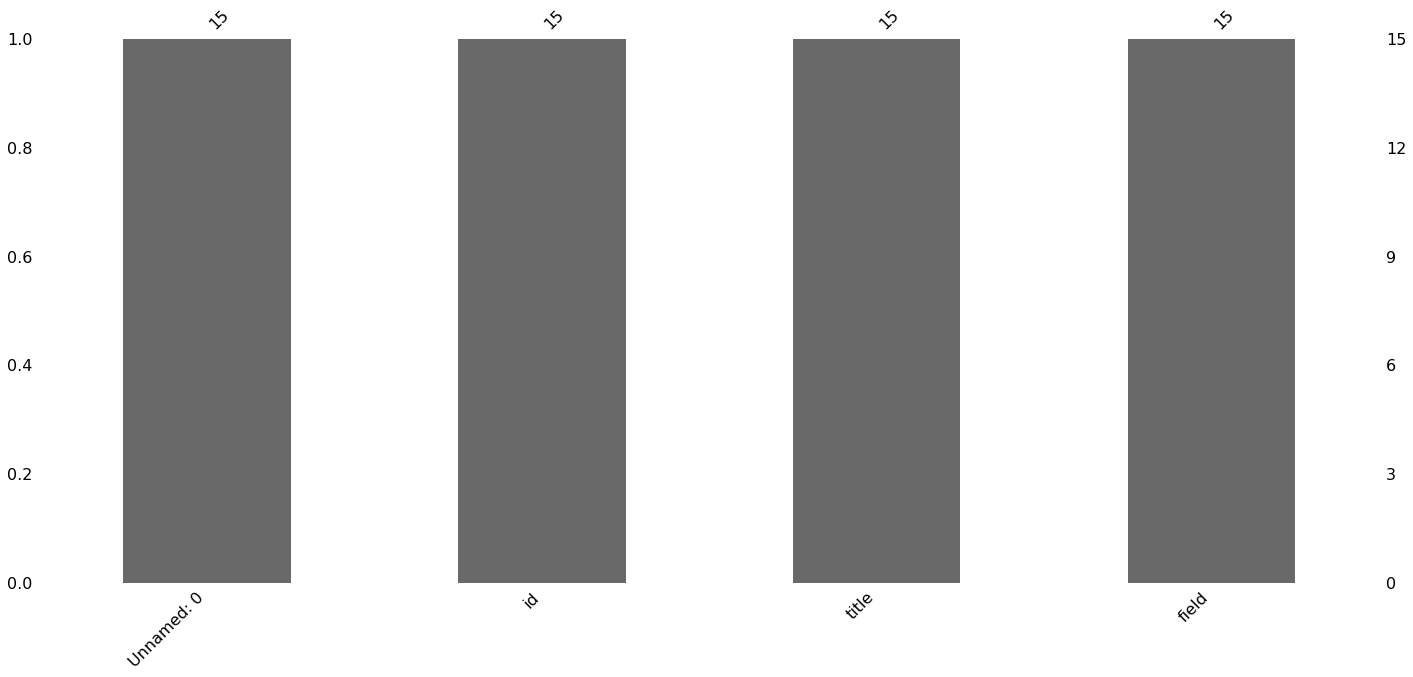

In [5]:
#Визуализация пропущенных значений в датафрейме courses
msno.bar(courses)

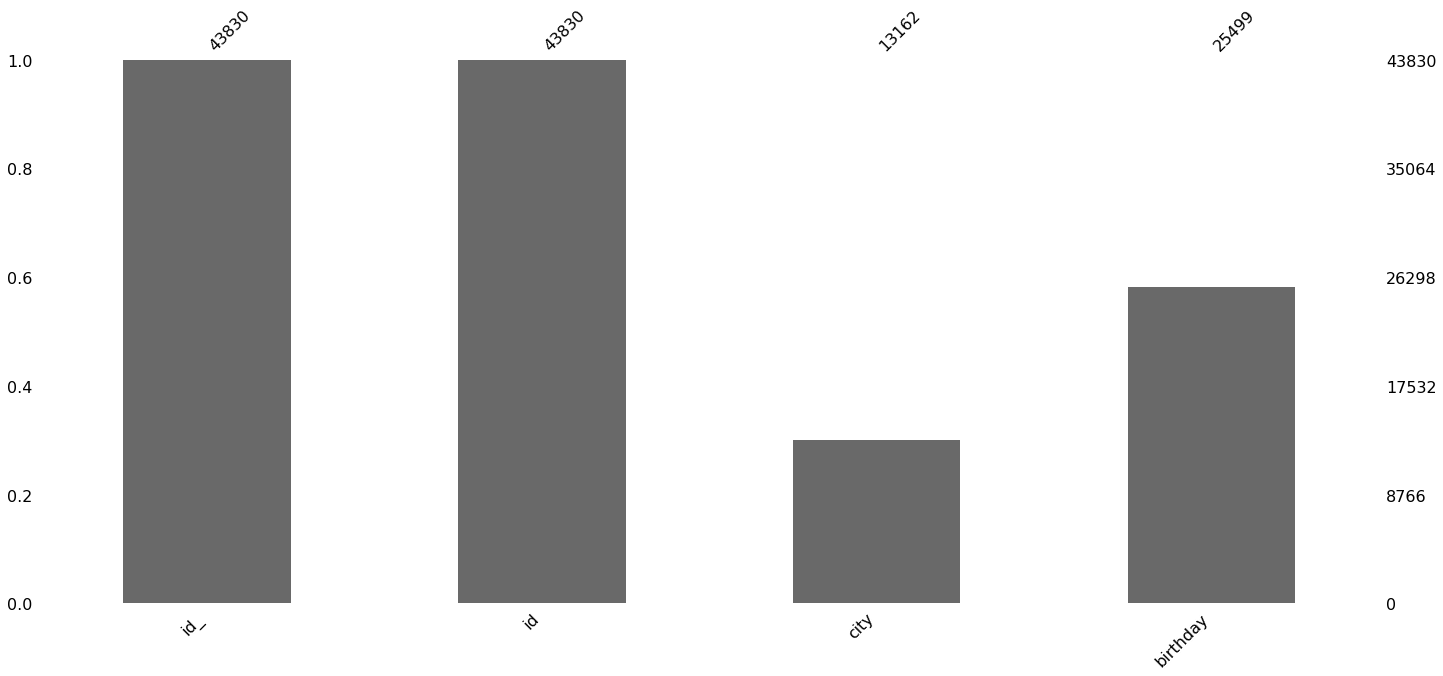

In [6]:
#Визуализация пропущенных значений в датафрейме students
msno.bar(students)

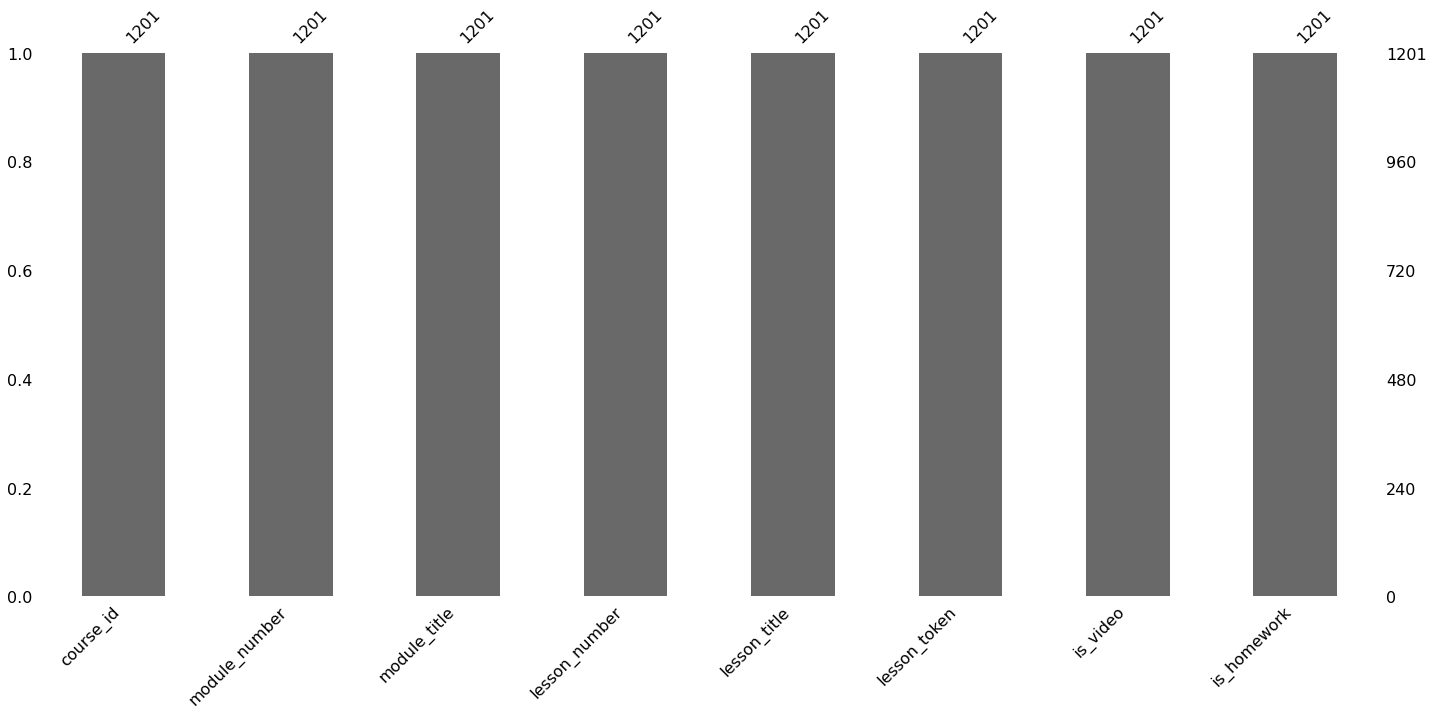

In [7]:
#Визуализация пропущенных значений в датафрейме course_contents
msno.bar(course_contents)

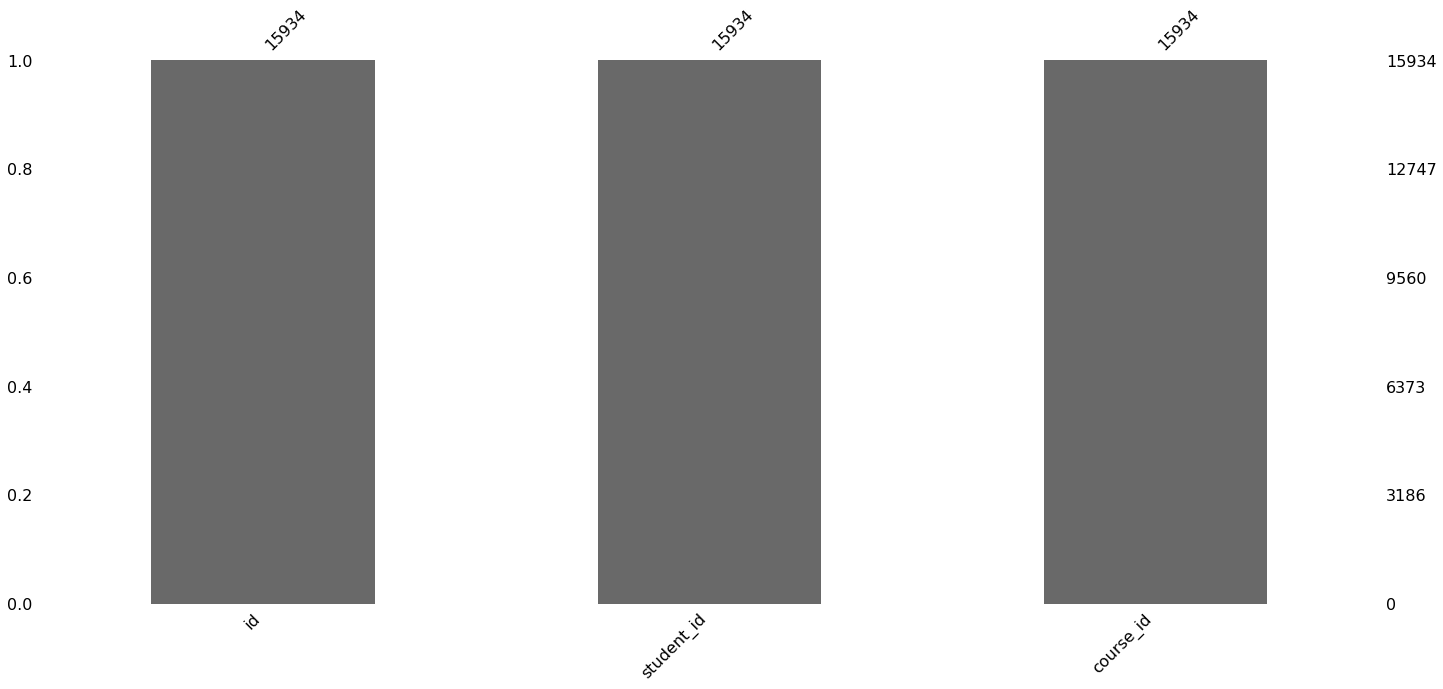

In [8]:
#Визуализация пропущенных значений в датафрейме progresses
msno.bar(progresses)

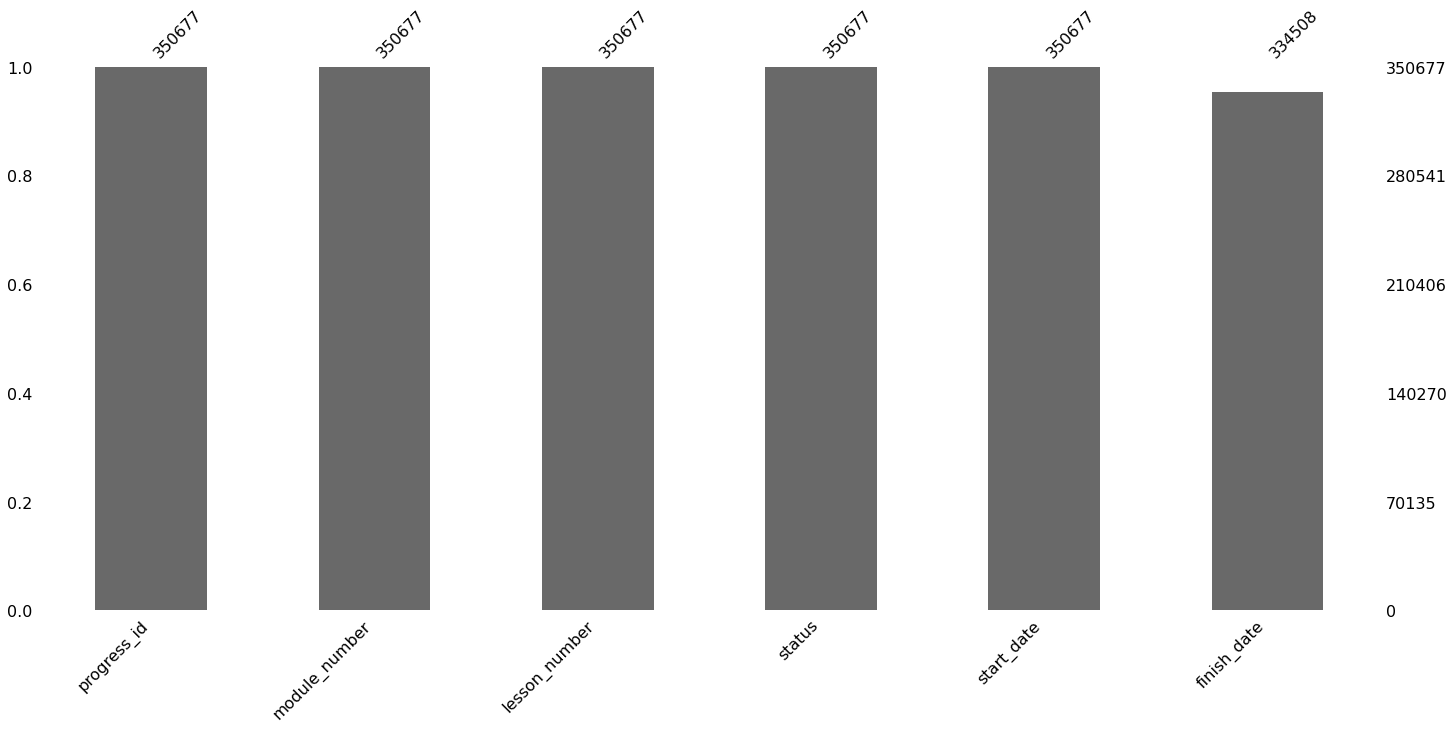

In [9]:
#Визуализация пропущенных значений в датафрейме progress_phases
msno.bar(progress_phases)

Пропущенные значения не касаются таких важных столбцов, как иденцифицированные. Отсюда следует, что join датафреймов можно смело делать с параметром inner

In [10]:
#Объединение датасетов (кроме students.scv)
main_df = pd.merge(progress_phases, course_contents, left_on=['module_number', 'lesson_number'], right_on=['module_number', 'lesson_number'], how='inner')
main_df = pd.merge(main_df, progresses, left_on=['course_id', 'progress_id'], right_on=['course_id', 'id'], how='inner')
main_df.drop(columns=['id'], inplace=True)
main_df = pd.merge(main_df, courses, left_on='course_id', right_on='id', how='inner')
main_df.drop(columns=['id'], inplace=True)
main_df.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,student_id,Unnamed: 0,title,field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design


In [11]:
print(len(main_df))

350677


Описание данных

In [12]:
#1 - общее количество курсов в датасете
print("Общее количесвто курсов в датасете", len(main_df.groupby(['title']).agg(['count'])))
print(main_df.groupby(['title']).count())

Общее количесвто курсов в датасете 15
                                     progress_id  ...  field
title                                             ...       
Excel Базовый                              18666  ...  18666
Java-разработчик                           24030  ...  24030
Java-разработчик c нуля                    14301  ...  14301
JavaScript с нуля                          20162  ...  20162
PHP-разработчик с 0 до PRO. Часть 1         5995  ...   5995
SMM-маркетолог от А до Я                    7688  ...   7688
UX-дизайн                                  23006  ...  23006
Анимация интерфейсов                        5937  ...   5937
Веб-вёрстка для начинающих 2.0             29694  ...  29694
Веб-дизайн PRO 2.0                         17268  ...  17268
Веб-дизайн Базовый                         16826  ...  16826
Веб-дизайн с нуля 2.0                      72906  ...  72906
Веб-разработчик                             5322  ...   5322
Интернет-маркетолог от Ingate              7199

In [13]:
#2 - количество модулей на каждом курсе
list_of_courses = main_df[['title']].groupby(['title']).count().index
for i in list_of_courses:
    tmp = main_df[main_df['title'] == i]
    print("Количество модулей на", i, "курсе, состовляет", len(tmp[['module_title']].groupby(['module_title']).count()))
    print("Модули:")
    print(tmp[['module_title']].groupby(['module_title']).count().index)
    print("\n")

Количество модулей на Excel Базовый курсе, состовляет 9
Модули:
Index([' Визуализация данных Excel', 'Основной функционал Excel',
       'Основной функционал Excel (продолжение)', 'Сводные таблицы Excel',
       'Формулы и функции Excel. Более сложные формулы',
       'Формулы и функции Excel. Введение',
       'Формулы и функции Excel. Продолжаем работать с формулами',
       'Формулы и функции Excel. Работа с ошибками, проверка данных',
       'Экзаменационная работа '],
      dtype='object', name='module_title')


Количество модулей на Java-разработчик курсе, состовляет 17
Модули:
Index(['Вводный модуль', 'Веб-приложения: формы, заголовки и сессии',
       'Внешний вид GUI и рисование', 'Заключительный модуль', 'Итоговая тема',
       'Массивы и коллекции', 'Многопоточность', 'Наследование и полиморфизм',
       'Объекты и классы', 'Оптимизация кода и приложений',
       'Основы построения GUI', 'Основы построения веб-приложений',
       'Работа с базами данных', 'Работа с файлами и

In [14]:
#3- количество уроков в каждом модуле на каждом курсе
for i in list_of_courses:
    tmp = main_df[main_df['title'] == i]
    list_of_modules = tmp[['module_title']].groupby(['module_title']).count().index
    print("Курс", i)
    for j in list_of_modules:
        tmp2 = tmp[tmp['module_title'] == j]
        print("\tКоличество уроков в модуле", j, " - ", len(tmp2[['lesson_title']].groupby(['lesson_title']).count()))
    print("\n")

Курс Excel Базовый
	Количество уроков в модуле  Визуализация данных Excel  -  5
	Количество уроков в модуле Основной функционал Excel  -  11
	Количество уроков в модуле Основной функционал Excel (продолжение)  -  7
	Количество уроков в модуле Сводные таблицы Excel  -  5
	Количество уроков в модуле Формулы и функции Excel. Более сложные формулы  -  5
	Количество уроков в модуле Формулы и функции Excel. Введение  -  3
	Количество уроков в модуле Формулы и функции Excel. Продолжаем работать с формулами  -  7
	Количество уроков в модуле Формулы и функции Excel. Работа с ошибками, проверка данных  -  5
	Количество уроков в модуле Экзаменационная работа   -  1


Курс Java-разработчик
	Количество уроков в модуле Вводный модуль  -  8
	Количество уроков в модуле Веб-приложения: формы, заголовки и сессии  -  6
	Количество уроков в модуле Внешний вид GUI и рисование  -  7
	Количество уроков в модуле Заключительный модуль  -  8
	Количество уроков в модуле Итоговая тема  -  1
	Количество уроков в м

In [15]:
#Медианное количество уроков в модуле на каждом курсе
mediana_of_les = []
mean_of_les = []
for i in list_of_courses:
    tmp = main_df[main_df['title'] == i]
    list_of_modules = tmp[['module_title']].groupby(['module_title']).count().index
    sum_of_lessons = 0
    min_of_lessons = 0
    max_of_lessons = 0
    for j, item in enumerate(list_of_modules):
        tmp2 = tmp[tmp['module_title'] == item]
        if j == 0:
            min_of_lessons = len(tmp2[['lesson_title']].groupby(['lesson_title']).count())
            max_of_lessons = len(tmp2[['lesson_title']].groupby(['lesson_title']).count())
        else:
            if len(tmp2[['lesson_title']].groupby(['lesson_title']).count()) > max_of_lessons:
                max_of_lessons = len(tmp2[['lesson_title']].groupby(['lesson_title']).count())
            if len(tmp2[['lesson_title']].groupby(['lesson_title']).count()) < min_of_lessons:
                min_of_lessons = len(tmp2[['lesson_title']].groupby(['lesson_title']).count())
        sum_of_lessons = sum_of_lessons + len(tmp2[['lesson_title']].groupby(['lesson_title']).count())
    print("Среднее количество уроков в модуле на курсе", i, ":", sum_of_lessons // len(list_of_modules))
    print("Медианное количество уроков в модуле на курсе", i, ":", (max_of_lessons + min_of_lessons) // 2)
    print("\n")
    mediana_of_les.append((max_of_lessons + min_of_lessons) // 2)
    mean_of_les.append(sum_of_lessons // len(list_of_modules))

#Конечно, можно было бы воспользоваться готовыми методами groupby(['lesson_title']).agg('median', 'mean')
#Мое решение сделать именно так, возникло из-за желания показать, что я понимаю что есть среднее и медиана=)

Среднее количество уроков в модуле на курсе Excel Базовый : 5
Медианное количество уроков в модуле на курсе Excel Базовый : 6


Среднее количество уроков в модуле на курсе Java-разработчик : 6
Медианное количество уроков в модуле на курсе Java-разработчик : 5


Среднее количество уроков в модуле на курсе Java-разработчик c нуля : 11
Медианное количество уроков в модуле на курсе Java-разработчик c нуля : 16


Среднее количество уроков в модуле на курсе JavaScript с нуля : 6
Медианное количество уроков в модуле на курсе JavaScript с нуля : 6


Среднее количество уроков в модуле на курсе PHP-разработчик с 0 до PRO. Часть 1 : 5
Медианное количество уроков в модуле на курсе PHP-разработчик с 0 до PRO. Часть 1 : 7


Среднее количество уроков в модуле на курсе SMM-маркетолог от А до Я : 5
Медианное количество уроков в модуле на курсе SMM-маркетолог от А до Я : 4


Среднее количество уроков в модуле на курсе UX-дизайн : 3
Медианное количество уроков в модуле на курсе UX-дизайн : 5


Среднее ко

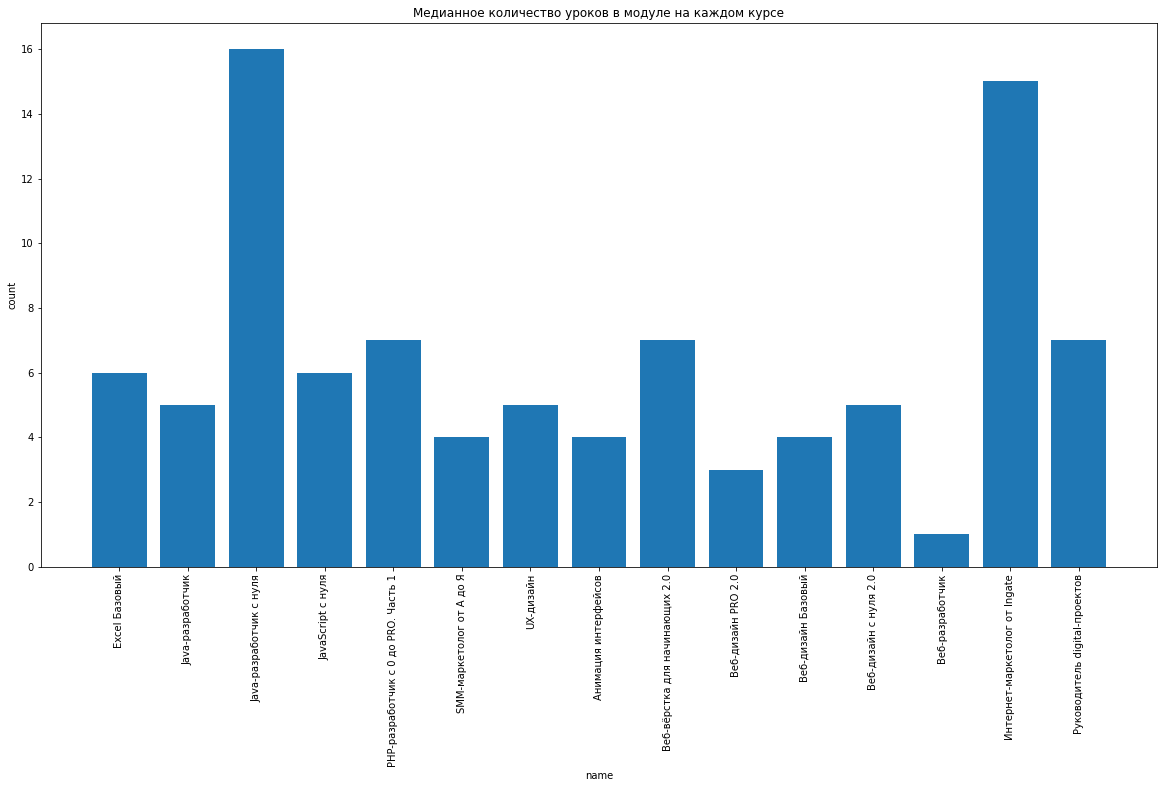

In [16]:
#Изобразим количество в виде графика
import matplotlib.pyplot as plt
d = {'name' : list_of_courses, 'count' : mediana_of_les}
df = pd.DataFrame(d, columns=['name','count'])
plt.figure(figsize=(20, 10))
plt.bar(df['name'], df['count'])
plt.xlabel("name")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("Медианное количество уроков в модуле на каждом курсе")
plt.show()

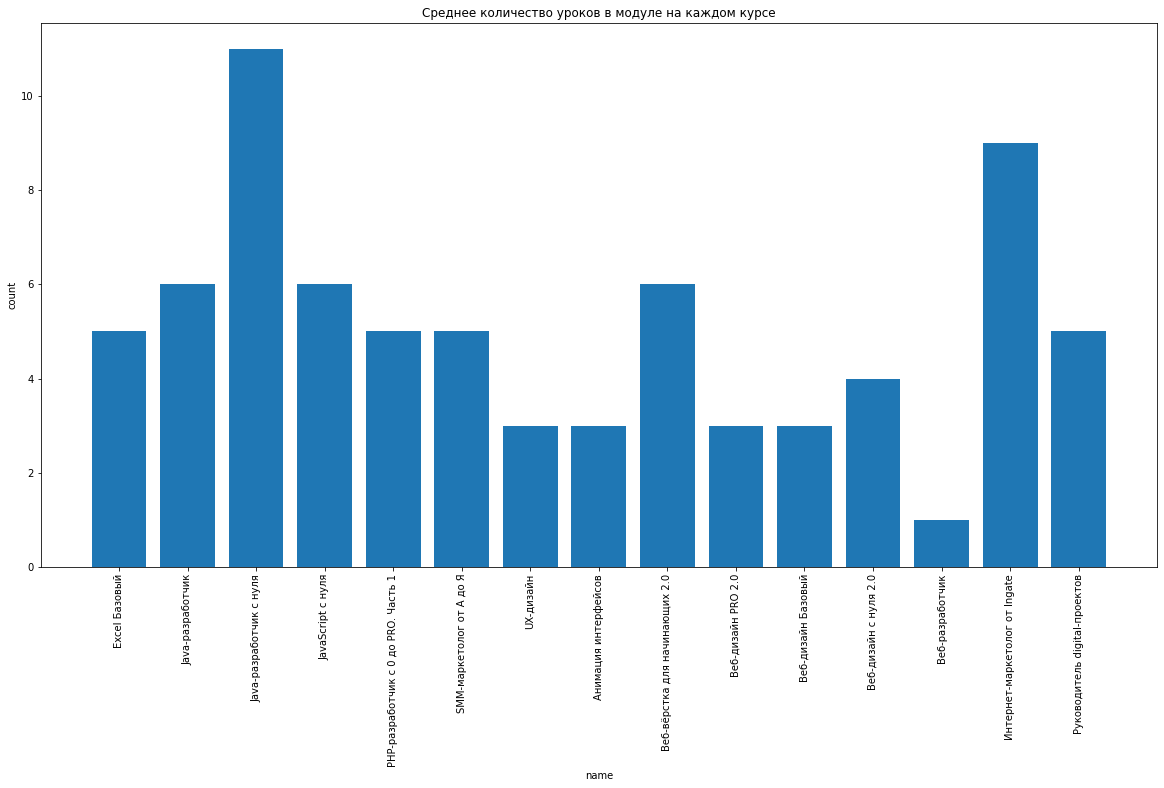

In [17]:
#Изобразим количество в виде графика
d = {'name' : list_of_courses, 'count' : mean_of_les}
df = pd.DataFrame(d, columns=['name','count'])
plt.figure(figsize=(20, 10))
plt.bar(df['name'], df['count'])
plt.xlabel("name")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("Среднее количество уроков в модуле на каждом курсе")
plt.show()

In [18]:
#4 - количество учеников на каждом курсе
count_of_students = []
name_of_course = []
id_of_students = []
for i in list_of_courses:
    tmp = main_df[main_df['title'] == i]
    print("Количество студентов на", i, "курсе, составляет", len(tmp[['student_id']].groupby(['student_id']).count()))
    id_of_students.append(list(tmp[['student_id']].groupby(['student_id']).count().index))
    count_of_students.append(len(tmp[['student_id']].groupby(['student_id']).count()))
    name_of_course.append(i)


Количество студентов на Excel Базовый курсе, составляет 782
Количество студентов на Java-разработчик курсе, составляет 763
Количество студентов на Java-разработчик c нуля курсе, составляет 581
Количество студентов на JavaScript с нуля курсе, составляет 966
Количество студентов на PHP-разработчик с 0 до PRO. Часть 1 курсе, составляет 854
Количество студентов на SMM-маркетолог от А до Я курсе, составляет 506
Количество студентов на UX-дизайн курсе, составляет 1151
Количество студентов на Анимация интерфейсов курсе, составляет 598
Количество студентов на Веб-вёрстка для начинающих 2.0 курсе, составляет 2004
Количество студентов на Веб-дизайн PRO 2.0 курсе, составляет 1711
Количество студентов на Веб-дизайн Базовый курсе, составляет 518
Количество студентов на Веб-дизайн с нуля 2.0 курсе, составляет 2014
Количество студентов на Веб-разработчик курсе, составляет 628
Количество студентов на Интернет-маркетолог от Ingate курсе, составляет 2168
Количество студентов на Руководитель digital-прое

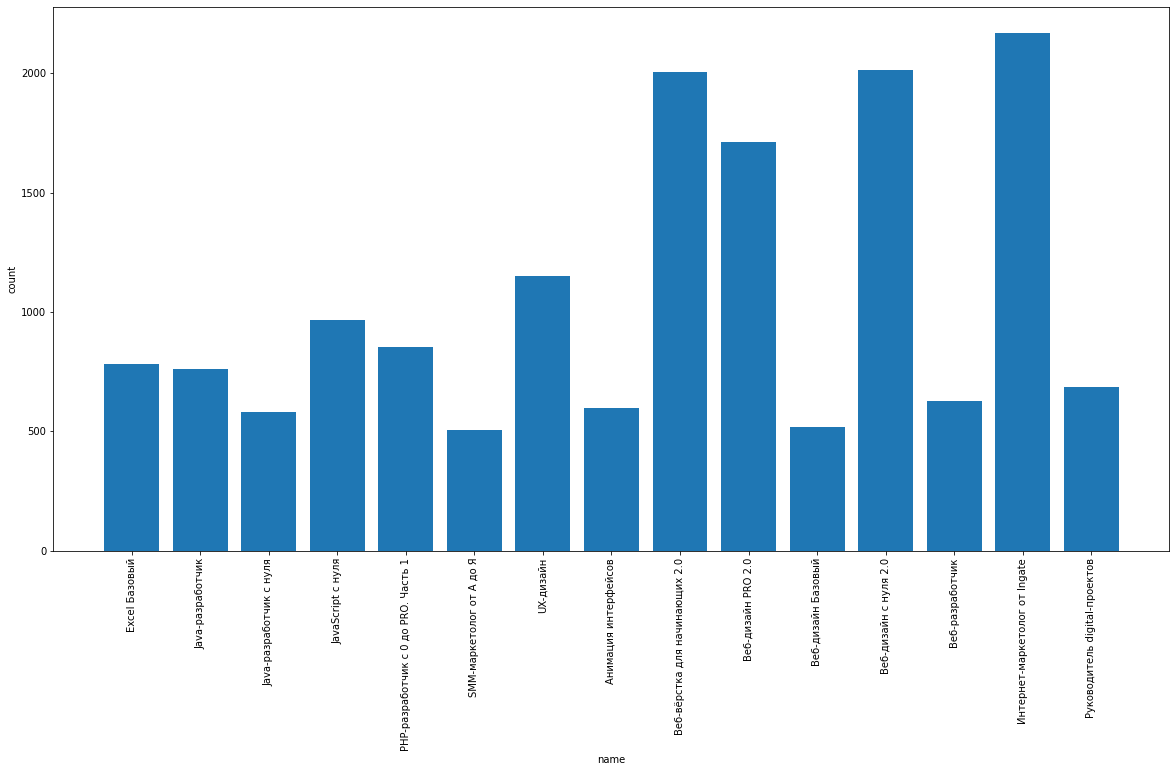

In [19]:
#Изобразим количество в виде графика
d = {'name' : name_of_course, 'count' : count_of_students}
df = pd.DataFrame(d, columns=['name','count'])
plt.figure(figsize=(20, 10))
plt.bar(df['name'], df['count'])
plt.xlabel("name")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [20]:
#Избавимся от пустых значений
tmp_students = students.dropna(subset=['birthday'])
tmp_students.head()

,id_,id,city,birthday
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16


In [21]:
#Добавим поле возраст age
tmp_students['birthday'] = pd.to_datetime(tmp_students['birthday'], errors='coerce')
now = pd.to_datetime('now')
tmp_students['age'] = (now - tmp_students['birthday']).astype('<m8[Y]')
tmp_students.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,40.0
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,29.0
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,33.0
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,32.0
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,29.0


In [22]:
tmp_students = tmp_students[tmp_students['age'] > 0]
tmp_students.describe()

,id_,age
count,25484.000000,25484.000000
mean,82715.310548,29.419675
std,37896.672222,8.010443
min,3898.000000,1.000000
25%,37457.750000,24.000000
50%,102693.500000,29.000000
75%,113483.750000,34.000000
max,124547.000000,136.000000


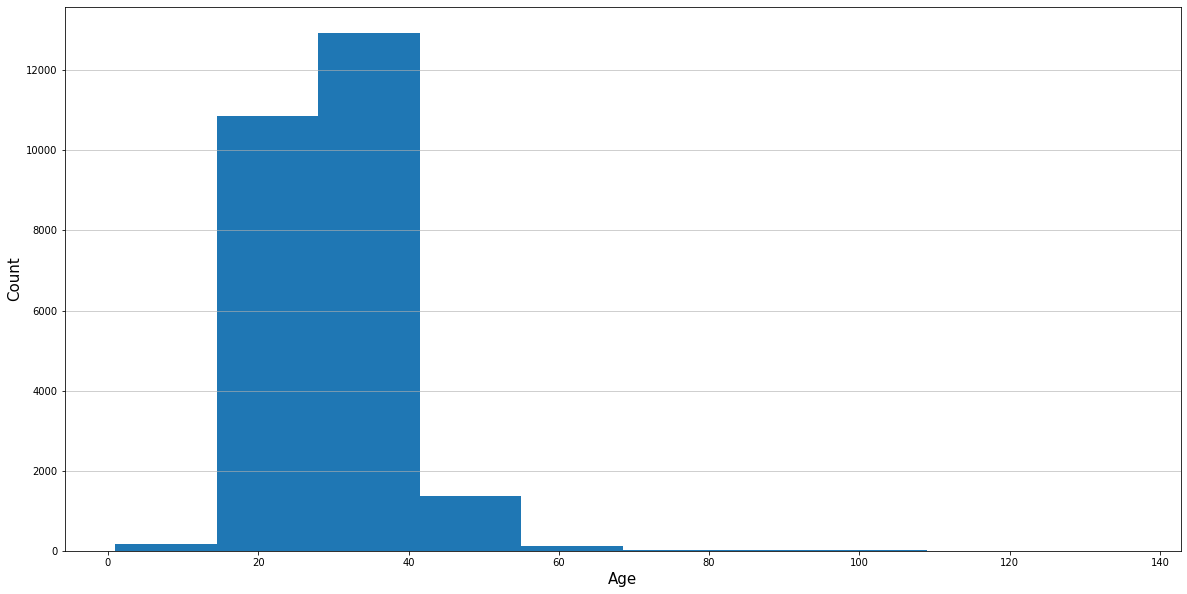

In [23]:
#Посмотрим плотность распределия в виде гистограммы значений
plt.figure(figsize=(20, 10))
plt.hist(tmp_students['age'])
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
tmp_students = tmp_students[['id', 'age']]
tmp_students.head()

,id,age
1,6c3e52be632fc50de9640147e4017dcd,40.0
7,35a36d90b745992b59085c8d54a072e7,29.0
8,37e8e8179295ae764524223086b0b568,33.0
11,fb10649db552c5f451bea45ed754d428,32.0
15,d15a188c90bb4d83957ac14de78fada4,29.0


In [25]:
for index, item_name in enumerate(name_of_course):
    print("Курс", item_name)
    d = {'student_id' : id_of_students[index]}
    df = pd.DataFrame(d, columns=['student_id'])
    df = pd.merge(df, tmp_students, left_on='student_id', right_on='id', how='inner')
    print(df.describe())
    print("\n")

Курс Excel Базовый
              age
count  668.000000
mean    33.919162
std      6.951280
min      2.000000
25%     29.000000
50%     34.000000
75%     39.000000
max     61.000000


Курс Java-разработчик
              age
count  688.000000
mean    29.661337
std      7.775422
min      6.000000
25%     24.000000
50%     29.000000
75%     34.000000
max     64.000000


Курс Java-разработчик c нуля
              age
count  581.000000
mean    29.839931
std      7.386627
min      6.000000
25%     25.000000
50%     29.000000
75%     34.000000
max     55.000000


Курс JavaScript с нуля
              age
count  917.000000
mean    28.872410
std      6.926948
min      1.000000
25%     24.000000
50%     28.000000
75%     33.000000
max     59.000000


Курс PHP-разработчик с 0 до PRO. Часть 1
              age
count  808.000000
mean    29.766089
std      7.904698
min      1.000000
25%     24.000000
50%     29.000000
75%     34.000000
max     75.000000


Курс SMM-маркетолог от А до Я
              ag

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

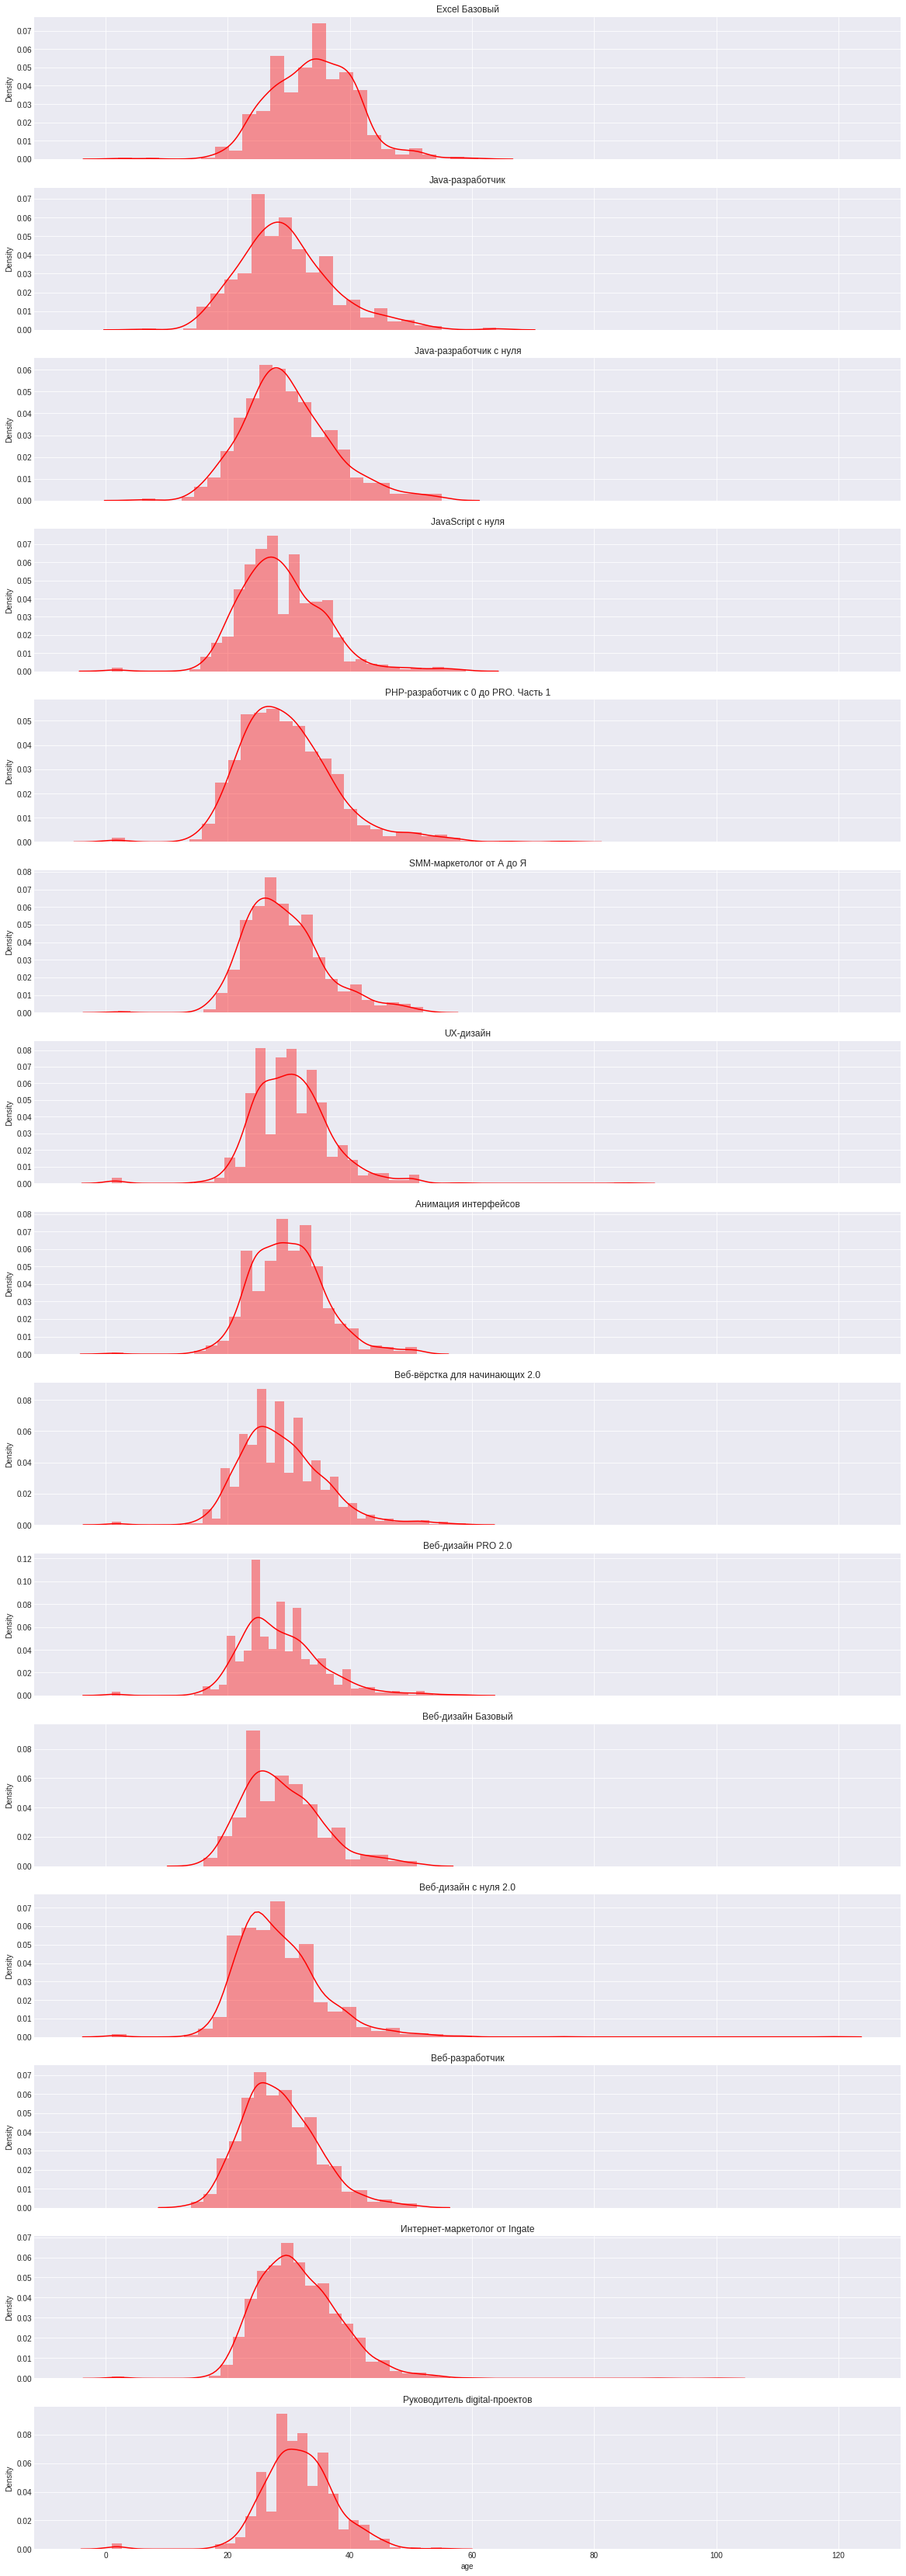

In [26]:
#Визуализируем для каждого курса
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

fig, axs = plt.subplots(len(name_of_course), figsize=(20, 60), sharex=True)

for index, item_name in enumerate(name_of_course):
    d = {'student_id' : id_of_students[index]}
    df = pd.DataFrame(d, columns=['student_id'])
    df = pd.merge(df, tmp_students, left_on='student_id', right_on='id', how='inner')
    sns.distplot(df['age'], color="red", ax=axs[index])
    axs[index].set_title(item_name)

Из первой части можно сказать:

1.   Веб-вёрстка для начинающих 2.0 
2.   Веб-дизайн PRO 2.0
3.   Веб-дизайн с нуля 2.0 
4.   Интернет-маркетолог от Ingate

Являются самыми популярными курсами, так как наиболее значимый отрыв состовляет у них, примерно раза в 4. Это говорит о тренде на рынке труда. 

С возрастом у студентов наблюдается признаки гаусовского распределения с эмпирическим средним равным 29. Аналогично, если рассматривать каждый курс.
Отсюда можно сделать вывод, хоть и небольшой, что люди рассматривают эти 4 направления самыми перспективными на данный момент. Также если рассматривать с точки зрения возраста, а среднее средних где-то 30 лет, то можно сказать, что они переквалифицируются на новую проффессию с учетом прибыльности этого дела.(Последнее наблюдение лишь некое дополнение к отчету)

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [27]:
#Добавим столбец year_month для подсчетов по месячно
main_df['year_month']=main_df['start_date'].apply(lambda x: str(x)[:7])
main_df.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,student_id,Unnamed: 0,title,field,year_month
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06


In [28]:
main_tmp = main_df[(main_df['is_homework'] == True)]
#Здесь я использовал изначальный датасет содержащий курсы
tmp = course_contents[course_contents['is_homework'] == True]
tmp.head()

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
5,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,3,Домашняя работа,f6f37ada-7763-4a06-9e45-a42ca568e69a,False,True
9,04ba6d0b40670c43a209141fa01fa784,3,Motion design в интерфейсах,4,Домашняя работа,4828bf79-2961-453e-a56e-4438c9135860,False,True
13,04ba6d0b40670c43a209141fa01fa784,4,After Effects,4,Домашняя работа,24426f0a-e85e-4ff4-9517-4938a70a0e96,False,True
17,04ba6d0b40670c43a209141fa01fa784,5,Иконки — погружение в мир микроанимации,4,Домашняя работа,1a4877a6-ffe7-47d3-b8bd-8f3b1b773baa,False,True


In [29]:
#Здесь нашел минимальный номер модуля с дз
tmp1 = tmp.groupby("course_id", as_index=False)["module_number"].min()
tmp1.head(15)

,course_id,module_number
0,04ba6d0b40670c43a209141fa01fa784,1
1,0770b1b039964228294f1f34b29fc2c1,1
2,17013cd19d25cb3f28dc1b2683721bb9,3
3,480d25ad36878fce09e7aada316ba1a6,1
4,6e4837f0a65c68efbfdd0594d6774701,1
5,842218e7c983795934bbe4533c0888c8,1
6,943306102e5b067d08a29094f37b8193,1
7,abce125a877c2196a3bc7bfbc11b5fc5,1
8,ac634845fb0350d0e9d49078aaa4b68f,1
9,bf27a4bf4ada4c756451703ea62a914f,1


In [30]:
tmp2 = pd.merge(tmp, tmp1, left_on=['course_id', 'module_number'], right_on=['course_id', 'module_number'], how='inner')
tmp2.head(15)

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
1,0770b1b039964228294f1f34b29fc2c1,1,Экологичный путь менеджера,4,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True
2,17013cd19d25cb3f28dc1b2683721bb9,3,Базовые знания о типографике. Практика Photoshop,2,Домашняя работа,192daf24-2575-4420-a09d-0c6b7960bc6d,False,True
3,480d25ad36878fce09e7aada316ba1a6,1,О программе,2,Домашняя работа,dffea62d-ab41-40c5-b465-62c2f9871ad8,False,True
4,6e4837f0a65c68efbfdd0594d6774701,1,Вводный модуль,8,Домашняя работа,97d70a1d-83d5-4dfd-8ad3-7fbd6e19b847,False,True
5,842218e7c983795934bbe4533c0888c8,1,Постановка задачи и анализ,6,Домашняя работа,7a5eaaef-8702-426e-9fa1-7a8e902b2bc9,False,True
6,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True
7,abce125a877c2196a3bc7bfbc11b5fc5,1,Вводный модуль,6,Домашняя работа,1eb308c8-9e05-4760-b8a9-64405055eb02,False,True
8,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True
9,bf27a4bf4ada4c756451703ea62a914f,1,"Введение в интернет-маркетинг: цели, инструмен...",7,Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True


In [31]:
#Делаем объединение чтобы убедиться, что нет повторений и мы сделали все правильно
tmp2 = pd.merge(courses, tmp2, left_on=['id'], right_on=['course_id'], how='inner')
tmp2.head(15)

,Unnamed: 0,id,title,field,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True
1,1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,17013cd19d25cb3f28dc1b2683721bb9,3,Базовые знания о типографике. Практика Photoshop,2,Домашняя работа,192daf24-2575-4420-a09d-0c6b7960bc6d,False,True
2,2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,False,True
3,3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business,0770b1b039964228294f1f34b29fc2c1,1,Экологичный путь менеджера,4,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True
4,4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,abce125a877c2196a3bc7bfbc11b5fc5,1,Вводный модуль,6,Домашняя работа,1eb308c8-9e05-4760-b8a9-64405055eb02,False,True
5,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,e9bb9205eeed307ee7cbaa08bfd166c3,1,Знакомство с языком,7,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True
6,6,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
7,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,c9fcb746d51e41bc5a217002d081454b,1,Специализация и личное позиционирование,6,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
8,8,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,dad6f6ffc086caa89e2f40c28a9c7490,1,Профессия дизайнера в эпоху цифровых перемен,8,Домашняя работа,474607cc-0b1b-405d-b391-21bb3fca7bd2,False,True
9,9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,bf27a4bf4ada4c756451703ea62a914f,1,"Введение в интернет-маркетинг: цели, инструмен...",7,Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True


In [32]:
#Объединим получившийся датафрейм с основным
main_tmp = main_df[(main_df['is_homework'] == True)]
tmp = pd.merge(main_tmp, tmp2, left_on=['course_id', 'module_number'], right_on=['course_id', 'module_number'], how='inner')
main_tmp = tmp
tmp.head()

,progress_id,module_number,lesson_number_x,status,start_date,finish_date,course_id,module_title_x,lesson_title_x,lesson_token_x,is_video_x,is_homework_x,student_id,Unnamed: 0_x,title_x,field_x,year_month,Unnamed: 0_y,id,title_y,field_y,module_title_y,lesson_number_y,lesson_title_y,lesson_token_y,is_video_y,is_homework_y
0,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,6,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
1,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,6,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
2,73e17a05355852fe65b785c82c37d1ad,1,6,done,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,ed235f47e16da6e83d3f1cb511f38ea6,7,Веб-дизайн PRO 2.0,Design,2019-07,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,6,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
3,cc3eb34ae49c719648352c4175daee88,1,6,done,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,59e8681cb7b5c8043ae1aac10c8053ca,7,Веб-дизайн PRO 2.0,Design,2018-07,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,6,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
4,04ace4fe130d90c801e24eea13ee808e,1,6,done,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,c16250079190337fe9074736e33eecb2,7,Веб-дизайн PRO 2.0,Design,2019-04,7,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,6,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [33]:
#Вот мы и получаем нужный датафрейм
tmp1 = main_tmp.groupby(['title_x', 'year_month']).size()
tmp1.head(10)

title_x        year_month
Excel Базовый  2018-02        6
               2018-03        3
               2018-05        3
               2018-06        9
               2018-07       13
               2018-08       15
               2018-09       40
               2018-10       30
               2018-11       33
               2018-12       43
dtype: int64

In [34]:
tmp1 = tmp1.unstack(level=-1)
tmp1.head(15)

year_month,2016-03,2016-11,2017-03,2017-04,2017-05,2017-06,2017-07,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
title_x,,,,,,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,NaN,3.0,9.0,13.0,15.0,40.0,30.0,33.0,43.0,52.0,46.0,63.0,46.0,45.0,43.0,28.0
Java-разработчик,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,14.0,26.0,14.0,25.0,33.0,48.0,29.0,53.0,33.0,32.0,102.0,75.0,50.0,74.0,7.0,4.0,4.0,3.0
Java-разработчик c нуля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,109.0,74.0,98.0,63.0
JavaScript с нуля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,13.0,15.0,17.0,18.0,23.0,42.0,36.0,37.0,57.0,42.0,57.0,49.0,51.0,34.0,21.0
PHP-разработчик с 0 до PRO. Часть 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9.0,7.0,12.0,19.0,18.0,28.0,31.0,27.0,35.0,35.0,23.0,38.0,32.0,30.0,29.0,15.0
SMM-маркетолог от А до Я,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,13.0,27.0,42.0,41.0,42.0,55.0,56.0,67.0,46.0
UX-дизайн,NaN,2.0,NaN,1.0,1.0,1.0,NaN,NaN,61.0,61.0,41.0,53.0,25.0,42.0,46.0,60.0,36.0,43.0,47.0,68.0,34.0,39.0,20.0,26.0,48.0,18.0
Анимация интерфейсов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,14.0,14.0,29.0,29.0,27.0,30.0,27.0,14.0,22.0,34.0,17.0,14.0,11.0,10.0,14.0,7.0
Веб-вёрстка для начинающих 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,97.0,117.0,78.0,81.0,132.0,119.0,83.0,105.0,91.0,82.0,89.0,72.0


In [35]:
#Получаем финальный датафрейм
tmp1 = tmp1.replace(np.nan, 0)
tmp1.head(15)

year_month,2016-03,2016-11,2017-03,2017-04,2017-05,2017-06,2017-07,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
title_x,,,,,,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,3.0,9.0,13.0,15.0,40.0,30.0,33.0,43.0,52.0,46.0,63.0,46.0,45.0,43.0,28.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,26.0,14.0,25.0,33.0,48.0,29.0,53.0,33.0,32.0,102.0,75.0,50.0,74.0,7.0,4.0,4.0,3.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,109.0,74.0,98.0,63.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,13.0,15.0,17.0,18.0,23.0,42.0,36.0,37.0,57.0,42.0,57.0,49.0,51.0,34.0,21.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,7.0,12.0,19.0,18.0,28.0,31.0,27.0,35.0,35.0,23.0,38.0,32.0,30.0,29.0,15.0
SMM-маркетолог от А до Я,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,13.0,27.0,42.0,41.0,42.0,55.0,56.0,67.0,46.0
UX-дизайн,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,61.0,61.0,41.0,53.0,25.0,42.0,46.0,60.0,36.0,43.0,47.0,68.0,34.0,39.0,20.0,26.0,48.0,18.0
Анимация интерфейсов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,15.0,14.0,14.0,29.0,29.0,27.0,30.0,27.0,14.0,22.0,34.0,17.0,14.0,11.0,10.0,14.0,7.0
Веб-вёрстка для начинающих 2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,97.0,117.0,78.0,81.0,132.0,119.0,83.0,105.0,91.0,82.0,89.0,72.0


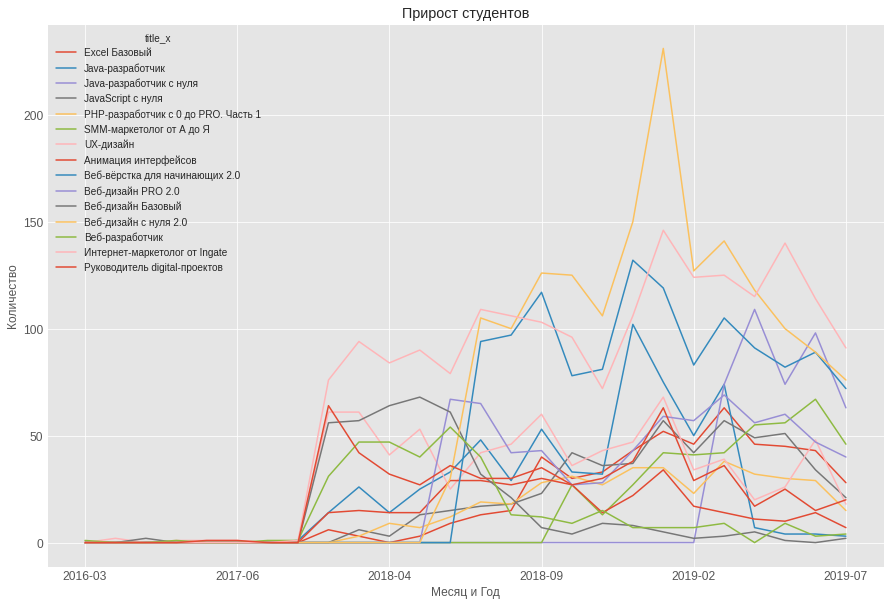

In [36]:
#Построим график по полученным данным
import matplotlib
matplotlib.style.use('ggplot')
ax = tmp1.transpose().plot(kind='line', title ="Прирост студентов", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Месяц и Год", fontsize=12)
ax.set_ylabel("Количество", fontsize=12)
plt.show()

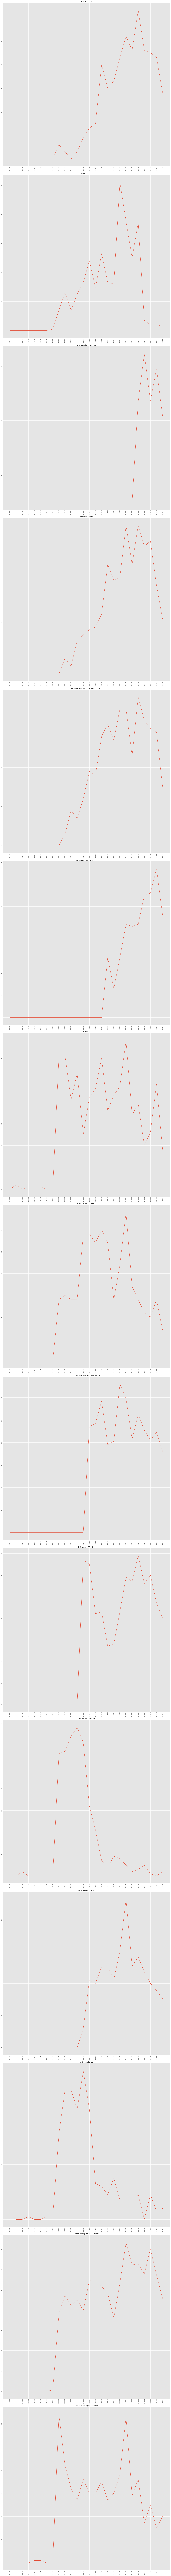

In [37]:
#Пункт 2.3 вывод 15 графиков
fig, axs = plt.subplots(len(name_of_course), figsize=(20, 300), tight_layout=True)

for index, course in enumerate(name_of_course):
    axs[index].plot(tmp1.transpose().index, tmp1.transpose()[course])
    axs[index].set_title(course)
    axs[index].tick_params(labelrotation=90)

In [38]:
#2.4
main_tmp = main_df[(main_df['is_homework']==True)].sort_values('start_date') #(main_df['title']=='Excel Базовый')&
main_tmp = main_tmp[['progress_id', 'title', 'module_number', 'module_title', 'lesson_title', 'student_id', 'lesson_token', 'status', 'start_date', 'finish_date']]
main_tmp['months'] = pd.DatetimeIndex(main_tmp['finish_date']).month - pd.DatetimeIndex(main_tmp['start_date']).month
main_tmp['months'].fillna(0.0, inplace=True)
main_tmp['dates'] = main_tmp.apply(lambda x: list(pd.date_range(start=str(x['start_date'])[:10], periods=int(x['months'])+1, freq='M')), axis=1)
main_tmp[main_tmp['months'] > 0.0].head(10)
#main_tmp.head(10)

,progress_id,title,module_number,module_title,lesson_title,student_id,lesson_token,status,start_date,finish_date,months,dates
17684,09c8727d51a4e5883d718291d6f0341c,UX-дизайн,1,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,5d002dd75d6173984fa61c83e864a716,474607cc-0b1b-405d-b391-21bb3fca7bd2,done,2016-11-30 01:09:16+00,2016-12-13 00:06:09+00,1.0,"[2016-11-30 00:00:00, 2016-12-31 00:00:00]"
30031,ccc4d33cca2c0ce087dd54cabc7f2a1e,UX-дизайн,6,UX-проектирование. Исследование интерфейсов,Домашняя работа,43b6d2d1c874b489f4398fc0d5737c71,3d7cee41-e25f-4970-ac70-739c87cc578c,done,2017-02-11 18:22:12+00,2017-03-13 15:51:47+00,1.0,"[2017-02-28 00:00:00, 2017-03-31 00:00:00]"
336665,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,"[2017-03-31 00:00:00, 2017-04-30 00:00:00, 201..."
346566,3dacb9b607a825c746a312d352991027,Веб-дизайн Базовый,5,Основы работы с графикой. Практика Photoshop,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,853f5a66-883e-4faf-8e4f-980769f58eaf,done,2017-03-29 17:13:42+00,2017-04-03 14:26:12+00,1.0,"[2017-03-31 00:00:00, 2017-04-30 00:00:00]"
308294,ae1dde4e137078361e972edb5bfb7908,Веб-разработчик,1,О программе,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,dffea62d-ab41-40c5-b465-62c2f9871ad8,done,2017-04-10 19:41:46+00,2017-05-16 11:02:43+00,1.0,"[2017-04-30 00:00:00, 2017-05-31 00:00:00]"
346585,3dacb9b607a825c746a312d352991027,Веб-дизайн Базовый,7,Формы и кнопки. Практика Photoshop,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,d9cc1293-4098-461a-976f-cf075aaf2692,done,2017-04-15 10:57:06+00,2017-05-20 11:23:50+00,1.0,"[2017-04-30 00:00:00, 2017-05-31 00:00:00]"
22886,b2f6a7e8a58d90b9db671d0a5b3eed20,UX-дизайн,2,Основные этапы проекта,Домашняя работа,969dd67c1431d69f6a330cd0b79e9f4a,75163626-ecea-4bd1-89a7-ec8b1557eba6,done,2017-04-26 14:10:30+00,2017-05-11 16:15:36+00,1.0,"[2017-04-30 00:00:00, 2017-05-31 00:00:00]"
308292,ae1dde4e137078361e972edb5bfb7908,Веб-разработчик,2,HTML. Общая структура HTML-документа,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,d3c6eb82-804d-4026-9a1a-9b22c7677658,done,2017-05-19 18:02:18+00,2017-06-13 08:50:59+00,1.0,"[2017-05-31 00:00:00, 2017-06-30 00:00:00]"
35591,3ea4ed76119768e81d833ab8a8a79ea7,UX-дизайн,2,Основные этапы проекта,Домашняя работа,56667a3346dea8b759b35e3071b0901b,75163626-ecea-4bd1-89a7-ec8b1557eba6,done,2017-05-31 19:39:25+00,2017-06-05 15:39:15+00,1.0,"[2017-05-31 00:00:00, 2017-06-30 00:00:00]"
26506,1179038d97470b72c43037449f6682fe,UX-дизайн,3,Service design: теория и практика,Домашняя работа,d8a7cf67e181e0d947d9cd0ed089e546,91b77c43-60f8-4850-ad32-5906c5bf3a82,done,2017-06-19 15:52:36+00,2017-07-03 07:56:53+00,1.0,"[2017-06-30 00:00:00, 2017-07-31 00:00:00]"


In [39]:
lst_col = 'dates'

r = pd.DataFrame({
      col:np.repeat(main_tmp[col].values, main_tmp[lst_col].str.len())
      for col in main_tmp.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(main_tmp[lst_col].values)})[main_tmp.columns]

r[r['months'] > 0.0].head(10)

,progress_id,title,module_number,module_title,lesson_title,student_id,lesson_token,status,start_date,finish_date,months,dates
7,09c8727d51a4e5883d718291d6f0341c,UX-дизайн,1,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,5d002dd75d6173984fa61c83e864a716,474607cc-0b1b-405d-b391-21bb3fca7bd2,done,2016-11-30 01:09:16+00,2016-12-13 00:06:09+00,1.0,2016-11-30
8,09c8727d51a4e5883d718291d6f0341c,UX-дизайн,1,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,5d002dd75d6173984fa61c83e864a716,474607cc-0b1b-405d-b391-21bb3fca7bd2,done,2016-11-30 01:09:16+00,2016-12-13 00:06:09+00,1.0,2016-12-31
10,ccc4d33cca2c0ce087dd54cabc7f2a1e,UX-дизайн,6,UX-проектирование. Исследование интерфейсов,Домашняя работа,43b6d2d1c874b489f4398fc0d5737c71,3d7cee41-e25f-4970-ac70-739c87cc578c,done,2017-02-11 18:22:12+00,2017-03-13 15:51:47+00,1.0,2017-02-28
11,ccc4d33cca2c0ce087dd54cabc7f2a1e,UX-дизайн,6,UX-проектирование. Исследование интерфейсов,Домашняя работа,43b6d2d1c874b489f4398fc0d5737c71,3d7cee41-e25f-4970-ac70-739c87cc578c,done,2017-02-11 18:22:12+00,2017-03-13 15:51:47+00,1.0,2017-03-31
12,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-03-31
13,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-04-30
14,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-05-31
15,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-06-30
17,3dacb9b607a825c746a312d352991027,Веб-дизайн Базовый,5,Основы работы с графикой. Практика Photoshop,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,853f5a66-883e-4faf-8e4f-980769f58eaf,done,2017-03-29 17:13:42+00,2017-04-03 14:26:12+00,1.0,2017-03-31
18,3dacb9b607a825c746a312d352991027,Веб-дизайн Базовый,5,Основы работы с графикой. Практика Photoshop,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,853f5a66-883e-4faf-8e4f-980769f58eaf,done,2017-03-29 17:13:42+00,2017-04-03 14:26:12+00,1.0,2017-04-30


In [40]:
r['year_month']=r['dates'].apply(lambda x: str(x)[:7])
main_tmp = r
main_tmp[main_tmp['months'] > 0.0].head(10)

,progress_id,title,module_number,module_title,lesson_title,student_id,lesson_token,status,start_date,finish_date,months,dates,year_month
7,09c8727d51a4e5883d718291d6f0341c,UX-дизайн,1,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,5d002dd75d6173984fa61c83e864a716,474607cc-0b1b-405d-b391-21bb3fca7bd2,done,2016-11-30 01:09:16+00,2016-12-13 00:06:09+00,1.0,2016-11-30,2016-11
8,09c8727d51a4e5883d718291d6f0341c,UX-дизайн,1,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,5d002dd75d6173984fa61c83e864a716,474607cc-0b1b-405d-b391-21bb3fca7bd2,done,2016-11-30 01:09:16+00,2016-12-13 00:06:09+00,1.0,2016-12-31,2016-12
10,ccc4d33cca2c0ce087dd54cabc7f2a1e,UX-дизайн,6,UX-проектирование. Исследование интерфейсов,Домашняя работа,43b6d2d1c874b489f4398fc0d5737c71,3d7cee41-e25f-4970-ac70-739c87cc578c,done,2017-02-11 18:22:12+00,2017-03-13 15:51:47+00,1.0,2017-02-28,2017-02
11,ccc4d33cca2c0ce087dd54cabc7f2a1e,UX-дизайн,6,UX-проектирование. Исследование интерфейсов,Домашняя работа,43b6d2d1c874b489f4398fc0d5737c71,3d7cee41-e25f-4970-ac70-739c87cc578c,done,2017-02-11 18:22:12+00,2017-03-13 15:51:47+00,1.0,2017-03-31,2017-03
12,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-03-31,2017-03
13,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-04-30,2017-04
14,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-05-31,2017-05
15,4bb0e827245856b474c55df73ce14eb0,Веб-дизайн Базовый,3,Базовые знания о типографике. Практика Photoshop,Домашняя работа,4262169e11959b72a3841b6c80f88e65,192daf24-2575-4420-a09d-0c6b7960bc6d,done,2017-03-05 06:52:16+00,2017-06-30 13:53:43+00,3.0,2017-06-30,2017-06
17,3dacb9b607a825c746a312d352991027,Веб-дизайн Базовый,5,Основы работы с графикой. Практика Photoshop,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,853f5a66-883e-4faf-8e4f-980769f58eaf,done,2017-03-29 17:13:42+00,2017-04-03 14:26:12+00,1.0,2017-03-31,2017-03
18,3dacb9b607a825c746a312d352991027,Веб-дизайн Базовый,5,Основы работы с графикой. Практика Photoshop,Домашняя работа,66785b2cb6103c7e04701c30657e5fc1,853f5a66-883e-4faf-8e4f-980769f58eaf,done,2017-03-29 17:13:42+00,2017-04-03 14:26:12+00,1.0,2017-04-30,2017-04


In [41]:
tmp1 = main_tmp.groupby(['title', 'year_month']).size()
tmp1.head(10)

title          year_month
Excel Базовый  2018-02        37
               2018-03         7
               2018-04        13
               2018-05        17
               2018-06        37
               2018-07        78
               2018-08        91
               2018-09       186
               2018-10       240
               2018-11       233
dtype: int64

In [42]:
tmp1 = tmp1.unstack(level=-1)
tmp1.head(15)

year_month,2016-03,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,7.0,13.0,17.0,37.0,78.0,91.0,186.0,240.0,233.0,203.0,290.0,330.0,365.0,331.0,340.0,297.0,210.0
Java-разработчик,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.0,109.0,88.0,93.0,137.0,203.0,189.0,191.0,232.0,203.0,283.0,367.0,434.0,501.0,305.0,217.0,134.0,62.0
Java-разработчик c нуля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,531.0,677.0,999.0,842.0
JavaScript с нуля,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,22.0,36.0,53.0,98.0,108.0,112.0,170.0,172.0,139.0,270.0,321.0,358.0,338.0,360.0,355.0,183.0
PHP-разработчик с 0 до PRO. Часть 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,26.0,37.0,55.0,90.0,84.0,109.0,127.0,99.0,100.0,124.0,95.0,135.0,153.0,161.0,120.0,65.0
SMM-маркетолог от А до Я,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,61.0,42.0,73.0,146.0,161.0,189.0,191.0,242.0,229.0
UX-дизайн,NaN,3.0,1.0,2.0,1.0,2.0,3.0,6.0,1.0,NaN,182.0,243.0,245.0,227.0,220.0,255.0,256.0,319.0,280.0,249.0,186.0,243.0,272.0,301.0,237.0,224.0,245.0,157.0
Анимация интерфейсов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,50.0,58.0,65.0,94.0,132.0,133.0,134.0,152.0,133.0,85.0,154.0,156.0,156.0,102.0,93.0,97.0,48.0
Веб-вёрстка для начинающих 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,287.0,397.0,403.0,406.0,352.0,442.0,502.0,576.0,537.0,506.0,469.0,293.0


In [43]:
#Получаем финальный датафрейм 2.4
tmp1 = tmp1.replace(np.nan, 0)
tmp1.head(15)

year_month,2016-03,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,7.0,13.0,17.0,37.0,78.0,91.0,186.0,240.0,233.0,203.0,290.0,330.0,365.0,331.0,340.0,297.0,210.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,109.0,88.0,93.0,137.0,203.0,189.0,191.0,232.0,203.0,283.0,367.0,434.0,501.0,305.0,217.0,134.0,62.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,531.0,677.0,999.0,842.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,22.0,36.0,53.0,98.0,108.0,112.0,170.0,172.0,139.0,270.0,321.0,358.0,338.0,360.0,355.0,183.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26.0,37.0,55.0,90.0,84.0,109.0,127.0,99.0,100.0,124.0,95.0,135.0,153.0,161.0,120.0,65.0
SMM-маркетолог от А до Я,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,61.0,42.0,73.0,146.0,161.0,189.0,191.0,242.0,229.0
UX-дизайн,0.0,3.0,1.0,2.0,1.0,2.0,3.0,6.0,1.0,0.0,182.0,243.0,245.0,227.0,220.0,255.0,256.0,319.0,280.0,249.0,186.0,243.0,272.0,301.0,237.0,224.0,245.0,157.0
Анимация интерфейсов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,50.0,58.0,65.0,94.0,132.0,133.0,134.0,152.0,133.0,85.0,154.0,156.0,156.0,102.0,93.0,97.0,48.0
Веб-вёрстка для начинающих 2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,287.0,397.0,403.0,406.0,352.0,442.0,502.0,576.0,537.0,506.0,469.0,293.0


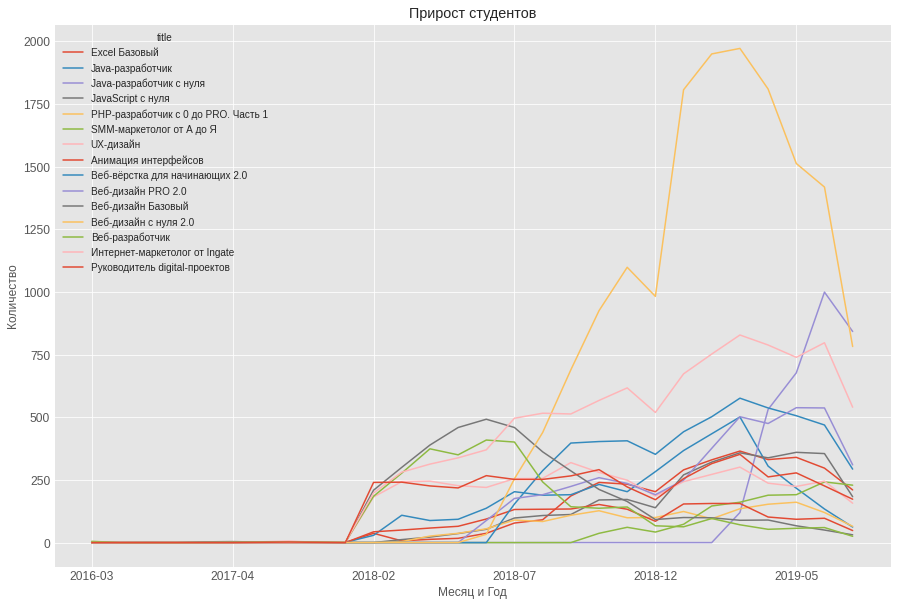

In [44]:
#Построим график по полученным данным 2.4
ax = tmp1.transpose().plot(kind='line', title ="Прирост студентов", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Месяц и Год", fontsize=12)
ax.set_ylabel("Количество", fontsize=12)
plt.show()

Начнем с того, что активность началась с 1го января 2018 года. Далее стремительный прирост студентов по 3м курсам - Руководитель digital-проектов, ux-дизайн и интернет маркетолог. Пик прироста приходится на конец 2018го-начало 2019го года. И видится картина спада прироста всех курсов на июнь 2019го. Самым популярным по росту числа за весь период данных у курса Веб дизайн с нуля 2.0. По числу прогрессов картина схожая. 

Можно предположить, что падение числа роста может служить снижение интереса в данных областях и снижение популярности специальностей(проффессий). Особенно это касается 3х курсов - java-разработчик, веб-разработчик и Анимация интерфейсов

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [45]:
tmp1 = pd.merge(course_contents, courses, left_on='course_id', right_on='id', how='inner')
tmp1 = tmp1[(tmp1['is_homework'] == True) & (tmp1['title'] == 'Java-разработчик c нуля')]
tmp1['lesson_number2'] = tmp1['lesson_number']
df = tmp1.groupby(['module_number', 'module_title']).agg({'lesson_number':'min', 'lesson_number2':'max'})[['lesson_number','lesson_number2']].reset_index()
df

,module_number,module_title,lesson_number,lesson_number2
0,1,Вводный модуль,7,7
1,2,Синтаксис языка,6,6
2,3,Объекты и классы,10,10
3,4,"Числа, строки и даты",6,27
4,5,Массивы и коллекции,5,13
5,6,Наследование и полиморфизм,2,13
6,7,Особенности ООП в Java,2,8
7,8,"Исключения, отладка, тестирование и логгирование",4,11
8,9,Работа с файлами и сетью,5,14


In [46]:
#Выражаю дни ввиде целых чисел, для сравнения
#Для этого беру инфинул некий для вычисления кол-ва дней от инфинума
main_tmp = main_df[(main_df['is_homework'] == True) & (main_df['status'] == 'done')]
main_tmp['finish_date'] = pd.to_datetime(main_tmp['finish_date'])
main_tmp['start_date'] = pd.to_datetime(main_tmp['start_date'])
main_tmp['finish_date_days'] = (pd.to_datetime(main_tmp['finish_date']) - pd.to_datetime('2000-01-01 10:10:36.957891+00')).dt.days
main_tmp['start_date_days'] = (pd.to_datetime(main_tmp['start_date']) - pd.to_datetime('2000-01-01 10:10:36.957891+00')).dt.days
main_tmp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,student_id,Unnamed: 0,title,field,year_month,finish_date_days,start_date_days
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06,6753,6746
15,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7015,7014
18,3b9dce04f32da32763124602557f92a3,2,5,done,2019-03-18 14:54:51.001460+00:00,2019-05-11 10:37:06.769771+00:00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7070,7016
23,3b9dce04f32da32763124602557f92a3,4,3,done,2019-05-10 17:31:53.799569+00:00,2019-05-14 13:08:10.899192+00:00,c9fcb746d51e41bc5a217002d081454b,Введение в UX,Домашнее задание #1,728c2b9c-60a9-40df-b341-202be9443288,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-05,7073,7069
26,3b9dce04f32da32763124602557f92a3,4,5,done,2019-05-14 12:31:07.806391+00:00,2019-05-31 18:06:10.778964+00:00,c9fcb746d51e41bc5a217002d081454b,Введение в UX,Домашнее задание #2,d5d90913-ae11-4a4e-b4ed-1800356a0d78,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-05,7090,7073


In [47]:
#Группируем по курсу, модулю и прогрессу и выводим минимальное из стартовых дней, при условии если дз несколько
#и максимальное при финишных дней
df1 = main_tmp.groupby(['course_id', 'title', 'module_number', 'module_title', 'progress_id']).agg({'start_date_days':'min', 'finish_date_days':'max'})[['start_date_days','finish_date_days']].reset_index()
df1.head()

,course_id,title,module_number,module_title,progress_id,start_date_days,finish_date_days
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",0029682bdb5be81e3bc3966ab728cf0c,6968,6988
1,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",005313709cc6b84861f660eb8d9fe507,6748,6749
2,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",00ac441da5e8bc71c5677e435f785704,6942,6942
3,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",014fb5de0f52f4cf59addf261a4219ff,6664,6664
4,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",019debce205c4bfc0e4d7a9557badbee,6824,6824


In [48]:
#Считаем затраченные дни
df1['pased_days'] = df1['finish_date_days'] - df1['start_date_days']
df1.head()

,course_id,title,module_number,module_title,progress_id,start_date_days,finish_date_days,pased_days
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",0029682bdb5be81e3bc3966ab728cf0c,6968,6988,20
1,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",005313709cc6b84861f660eb8d9fe507,6748,6749,1
2,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",00ac441da5e8bc71c5677e435f785704,6942,6942,0
3,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",014fb5de0f52f4cf59addf261a4219ff,6664,6664,0
4,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",019debce205c4bfc0e4d7a9557badbee,6824,6824,0


In [49]:
#Финильный датафрейм
df1.groupby(['title', 'module_number', 'module_title']).agg({'pased_days':['min', 'max', 'mean', 'median']})[['pased_days']].reset_index()

title module_number  ... pased_days       
                                                  ...       mean median
0                    Excel Базовый             1  ...   5.807860    2.0
1                    Excel Базовый             2  ...   4.145320    2.0
2                    Excel Базовый             3  ...   3.284238    1.0
3                    Excel Базовый             4  ...  10.778878    3.0
4                    Excel Базовый             5  ...   7.237037    3.0
..                             ...           ...  ...        ...    ...
185  Руководитель digital-проектов            12  ...  20.943182    7.0
186  Руководитель digital-проектов            13  ...  25.782609   11.0
187  Руководитель digital-проектов            14  ...  14.343750    7.5
188  Руководитель digital-проектов            15  ...   6.390625    2.0
189  Руководитель digital-проектов            16  ...  17.879310    6.0

[190 rows x 7 columns]

Как можно было ожидать, большее время занимают в среднем модули с экзаменационными(итоговыми) работами.
Но можно и заметить большие скачки на курсах UX-дизайн, это можно объяснить тем, что модули, на которые были затрачены более 20 часов являются достаточно трудными.
Если рассмотреть графики, где показаны затраты на курсы, то можно сразу выделить из курсов модули, на которых среднее время затрачивается достаточно много.
На графике, где показаны показаны время выполнения домашних заданий видется, чисто субъективно неплохие кривые, в большинстве курсов, это может означать доступность объяснения на лекциях, что приводит к успешному выполнению заданий.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [50]:
main_tmp = main_df[(main_df['is_homework'] == True)]
main_tmp['finish_date'] = pd.to_datetime(main_tmp['finish_date'])
main_tmp['start_date'] = pd.to_datetime(main_tmp['start_date'])
main_tmp['finish_date_days'] = (pd.to_datetime(main_tmp['finish_date']) - pd.to_datetime('2000-01-01 10:10:36.957891+00')).dt.days
main_tmp['start_date_days'] = (pd.to_datetime(main_tmp['start_date']) - pd.to_datetime('2000-01-01 10:10:36.957891+00')).dt.days
main_tmp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,student_id,Unnamed: 0,title,field,year_month,finish_date_days,start_date_days
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06,6753.0,6746
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00:00,NaT,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06,NaN,6747
15,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7015.0,7014
18,3b9dce04f32da32763124602557f92a3,2,5,done,2019-03-18 14:54:51.001460+00:00,2019-05-11 10:37:06.769771+00:00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7070.0,7016
23,3b9dce04f32da32763124602557f92a3,4,3,done,2019-05-10 17:31:53.799569+00:00,2019-05-14 13:08:10.899192+00:00,c9fcb746d51e41bc5a217002d081454b,Введение в UX,Домашнее задание #1,728c2b9c-60a9-40df-b341-202be9443288,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-05,7073.0,7069


In [51]:
df1 = main_tmp.groupby(['course_id', 'title', 'module_number', 'module_title', 'progress_id', 'student_id']).agg({'start_date_days':'min'})[['start_date_days']].reset_index()
df1.head()

,course_id,title,module_number,module_title,progress_id,student_id,start_date_days
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",0029682bdb5be81e3bc3966ab728cf0c,31d387df0320a7de46fb41fd4b251b37,6968
1,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",005313709cc6b84861f660eb8d9fe507,ac38671e8f5f13ff93d3a5faec47c1fb,6748
2,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",00ac441da5e8bc71c5677e435f785704,1be3f3dc1b37e27afe50d2f13a44b8c0,6942
3,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",014fb5de0f52f4cf59addf261a4219ff,aba93fe20a60f1d3c8b9cb0a4514d498,6664
4,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",019debce205c4bfc0e4d7a9557badbee,f4252a8a3716650bd3f0deb10dede133,6824


In [52]:
df1 = pd.DataFrame({'count1' : df1.groupby(['title', 'module_number', 'module_title']).size()}).reset_index()
df1.head()

,title,module_number,module_title,count1
0,Excel Базовый,1,Основной функционал Excel,518
1,Excel Базовый,2,Основной функционал Excel (продолжение),434
2,Excel Базовый,3,Формулы и функции Excel. Введение,398
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298


In [53]:
main_tmp = main_df[(main_df['is_homework'] == True) & (main_df['status'] == 'done')]
main_tmp['finish_date'] = pd.to_datetime(main_tmp['finish_date'])
main_tmp['start_date'] = pd.to_datetime(main_tmp['start_date'])
main_tmp['finish_date_days'] = (pd.to_datetime(main_tmp['finish_date']) - pd.to_datetime('2000-01-01 10:10:36.957891+00')).dt.days
main_tmp['start_date_days'] = (pd.to_datetime(main_tmp['start_date']) - pd.to_datetime('2000-01-01 10:10:36.957891+00')).dt.days
main_tmp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,student_id,Unnamed: 0,title,field,year_month,finish_date_days,start_date_days
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,7,Веб-дизайн PRO 2.0,Design,2018-06,6753,6746
15,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7015,7014
18,3b9dce04f32da32763124602557f92a3,2,5,done,2019-03-18 14:54:51.001460+00:00,2019-05-11 10:37:06.769771+00:00,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-03,7070,7016
23,3b9dce04f32da32763124602557f92a3,4,3,done,2019-05-10 17:31:53.799569+00:00,2019-05-14 13:08:10.899192+00:00,c9fcb746d51e41bc5a217002d081454b,Введение в UX,Домашнее задание #1,728c2b9c-60a9-40df-b341-202be9443288,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-05,7073,7069
26,3b9dce04f32da32763124602557f92a3,4,5,done,2019-05-14 12:31:07.806391+00:00,2019-05-31 18:06:10.778964+00:00,c9fcb746d51e41bc5a217002d081454b,Введение в UX,Домашнее задание #2,d5d90913-ae11-4a4e-b4ed-1800356a0d78,False,True,03151bc73bdb29fe1be1443c6d83e22f,7,Веб-дизайн PRO 2.0,Design,2019-05,7090,7073


In [54]:
df2 = main_tmp.groupby(['course_id', 'title', 'module_number', 'module_title', 'progress_id', 'student_id']).agg({'start_date_days':'max'})[['start_date_days']].reset_index()
df2.head()

,course_id,title,module_number,module_title,progress_id,student_id,start_date_days
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",0029682bdb5be81e3bc3966ab728cf0c,31d387df0320a7de46fb41fd4b251b37,6968
1,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",005313709cc6b84861f660eb8d9fe507,ac38671e8f5f13ff93d3a5faec47c1fb,6748
2,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",00ac441da5e8bc71c5677e435f785704,1be3f3dc1b37e27afe50d2f13a44b8c0,6942
3,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",014fb5de0f52f4cf59addf261a4219ff,aba93fe20a60f1d3c8b9cb0a4514d498,6664
4,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",019debce205c4bfc0e4d7a9557badbee,f4252a8a3716650bd3f0deb10dede133,6824


In [55]:
df2 = pd.DataFrame({'count2' : df2.groupby(['title', 'module_number', 'module_title']).size()}).reset_index()
df2.head()

,title,module_number,module_title,count2
0,Excel Базовый,1,Основной функционал Excel,458
1,Excel Базовый,2,Основной функционал Excel (продолжение),406
2,Excel Базовый,3,Формулы и функции Excel. Введение,387
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,303
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,270


In [56]:
main_tmp = pd.merge(df1, df2, left_on=['module_number', 'title'], right_on=['module_number', 'title'], how='inner')
main_tmp.head()

,title,module_number,module_title_x,count1,module_title_y,count2
0,Excel Базовый,1,Основной функционал Excel,518,Основной функционал Excel,458
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,Основной функционал Excel (продолжение),406
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,Формулы и функции Excel. Введение,387
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,Формулы и функции Excel. Продолжаем работать с...,303
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,Формулы и функции Excel. Более сложные формулы,270


In [57]:
main_tmp['output']= main_tmp['count1']/main_tmp['count2'].shift(1)
main_tmp.head()

,title,module_number,module_title_x,count1,module_title_y,count2,output
0,Excel Базовый,1,Основной функционал Excel,518,Основной функционал Excel,458,NaN
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,Основной функционал Excel (продолжение),406,0.947598
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,Формулы и функции Excel. Введение,387,0.980296
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,Формулы и функции Excel. Продолжаем работать с...,303,0.891473
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,Формулы и функции Excel. Более сложные формулы,270,0.983498


In [59]:
main_tmp.dropna(inplace=True)
main_tmp.head()

,title,module_number,module_title_x,count1,module_title_y,count2,output
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,Основной функционал Excel (продолжение),406,0.947598
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,Формулы и функции Excel. Введение,387,0.980296
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,Формулы и функции Excel. Продолжаем работать с...,303,0.891473
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,Формулы и функции Excel. Более сложные формулы,270,0.983498
5,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,"Формулы и функции Excel. Работа с ошибками, пр...",242,0.974074


[' Визуализация данных Excel', 'Основной функционал Excel (продолжение)', 'Сводные таблицы Excel', 'Формулы и функции Excel. Более сложные формулы', 'Формулы и функции Excel. Введение', 'Формулы и функции Excel. Продолжаем работать с формулами', 'Формулы и функции Excel. Работа с ошибками, проверка данных', 'Экзаменационная работа ']
[0.9834710743801653, 0.9475982532751092, 1.01, 0.9834983498349835, 0.9802955665024631, 0.8914728682170543, 0.9740740740740741, 1.0268817204301075]
['Вводный модуль', 'Веб-приложения: формы, заголовки и сессии', 'Внешний вид GUI и рисование', 'Итоговая тема', 'Массивы и коллекции', 'Многопоточность', 'Наследование и полиморфизм', 'Объекты и классы', 'Оптимизация кода и приложений', 'Основы построения GUI', 'Основы построения веб-приложений', 'Работа с базами данных', 'Работа с файлами и сетью', 'Синтаксис языка', 'Тестирование и отладка', 'Числа, строки и даты']
[6.8901098901098905, 1.0434782608695652, 1.0566037735849056, 1.105263157894737, 0.93103448275862

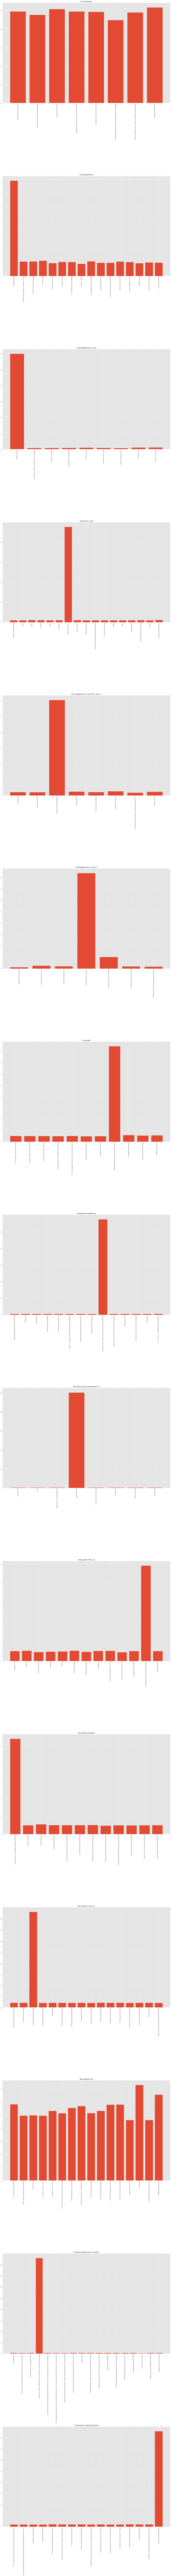

In [66]:
fig, axs = plt.subplots(len(name_of_course), figsize=(20, 300), tight_layout=True)

array_for_new_df = []

for index, course in enumerate(name_of_course):
    tmp = main_tmp[main_tmp['title'] == course]
    list_of_modules = tmp[['module_title_x']].groupby(['module_title_x']).count().index
    x = []
    y = []
    for module in list_of_modules:
        x.append(module)
        tmp2 = tmp[tmp['module_title_x'] == module]
        y.append(float(tmp2['output']))
    print(x)
    print(y)
    axs[index].bar(x, y)
    axs[index].set_title(course)
    axs[index].tick_params(labelrotation=90)

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 